In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")
df = pd.read_csv("saudi_flight_data_final.csv")

In [ ]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10683 non-null  object 
 1   Date_of_Journey   10683 non-null  object 
 2   Source            10683 non-null  object 
 3   Destination       10683 non-null  object 
 4   Route             10683 non-null  object 
 5   Dep_Time          10683 non-null  object 
 6   Arrival_Time      10683 non-null  object 
 7   Duration          10683 non-null  object 
 8   Total_Stops       10682 non-null  object 
 9   Additional_Info   10683 non-null  object 
 10  Price             10683 non-null  int64  
 11  Airline_clean     10683 non-null  object 
 12  Source_clean      10683 non-null  object 
 13  Duration_Minutes  10683 non-null  int64  
 14  Total_Stops_Num   10682 non-null  float64
 15  Source_Code       10683 non-null  object 
dtypes: float64(1), int64(2), object(13)
memo

,Price,Duration_Minutes,Total_Stops_Num
count,10683.000000,10683.000000,10682.000000
mean,9087.064121,643.093232,0.824190
std,4611.359167,507.862001,0.675229
min,1759.000000,5.000000,0.000000
25%,5277.000000,170.000000,0.000000
50%,8372.000000,520.000000,1.000000
75%,12373.000000,930.000000,1.000000
max,79512.000000,2860.000000,4.000000


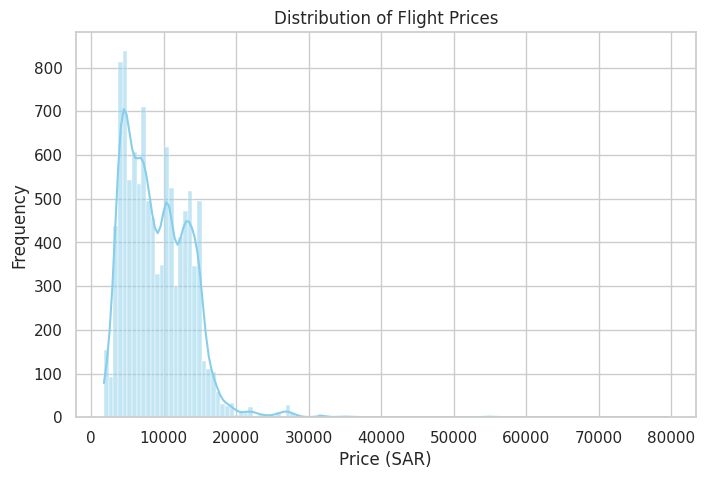

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'] , kde=True, color='skyblue')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price (SAR)')
plt.ylabel('Frequency')
plt.show()

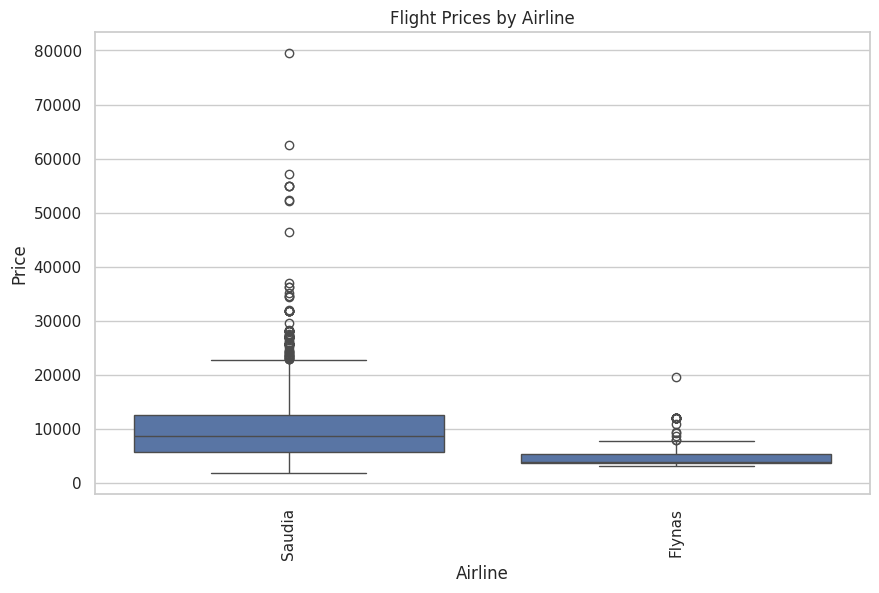

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Flight Prices by Airline')
plt.xticks(rotation=90)
plt.show()

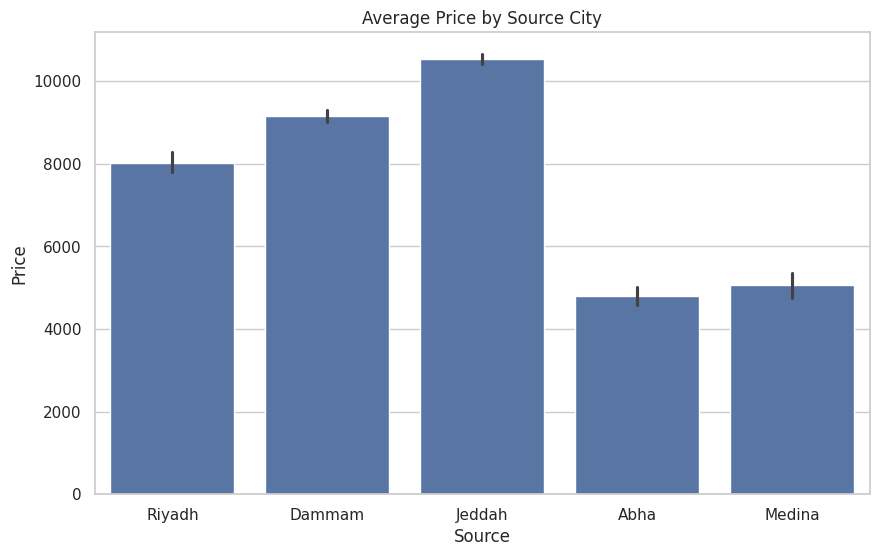

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Source', y='Price', data=df, estimator='mean')
plt.title('Average Price by Source City')
plt.show()

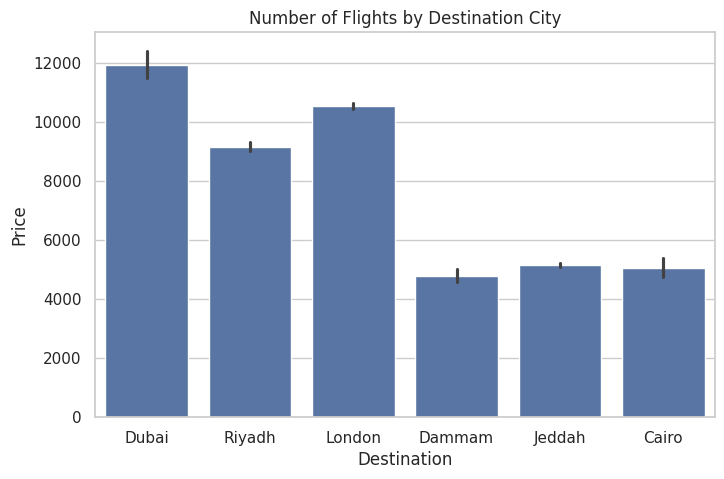

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Destination', y='Price', data=df, estimator='mean')
plt.title('Number of Flights by Destination City')
plt.show()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")
df = pd.read_csv("saudi_flight_data_final.csv")

In [8]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10683 non-null  object 
 1   Date_of_Journey   10683 non-null  object 
 2   Source            10683 non-null  object 
 3   Destination       10683 non-null  object 
 4   Route             10683 non-null  object 
 5   Dep_Time          10683 non-null  object 
 6   Arrival_Time      10683 non-null  object 
 7   Duration          10683 non-null  object 
 8   Total_Stops       10682 non-null  object 
 9   Additional_Info   10683 non-null  object 
 10  Price             10683 non-null  int64  
 11  Airline_clean     10683 non-null  object 
 12  Source_clean      10683 non-null  object 
 13  Duration_Minutes  10683 non-null  int64  
 14  Total_Stops_Num   10682 non-null  float64
 15  Source_Code       10683 non-null  object 
dtypes: float64(1), int64(2), object(13)
memo

,Price,Duration_Minutes,Total_Stops_Num
count,10683.000000,10683.000000,10682.000000
mean,9087.064121,643.093232,0.824190
std,4611.359167,507.862001,0.675229
min,1759.000000,5.000000,0.000000
25%,5277.000000,170.000000,0.000000
50%,8372.000000,520.000000,1.000000
75%,12373.000000,930.000000,1.000000
max,79512.000000,2860.000000,4.000000


In [9]:
def parse_duration(x):
    h, m = 0, 0
    if 'h' in x:
        h = int(x.split('h')[0])
    if 'm' in x:
        m = int(x.split('h')[-1].replace('m', '').strip() or 0)
    return h*60 + m

df['Duration_mins'] = df['Duration'].apply(parse_duration)

In [11]:
df.drop('Duration', axis=1, inplace=True)
df.rename(columns={'Duration_mins': 'Duration'}, inplace=True)

In [12]:
df[['Duration']].head(10)
df['Duration'].describe()

,Duration
count,10683.000000
mean,643.093232
std,507.862001
min,5.000000
25%,170.000000
50%,520.000000
75%,930.000000
max,2860.000000


In [13]:
df.to_csv('saudi_flight_data_final_updated.csv', index=False)

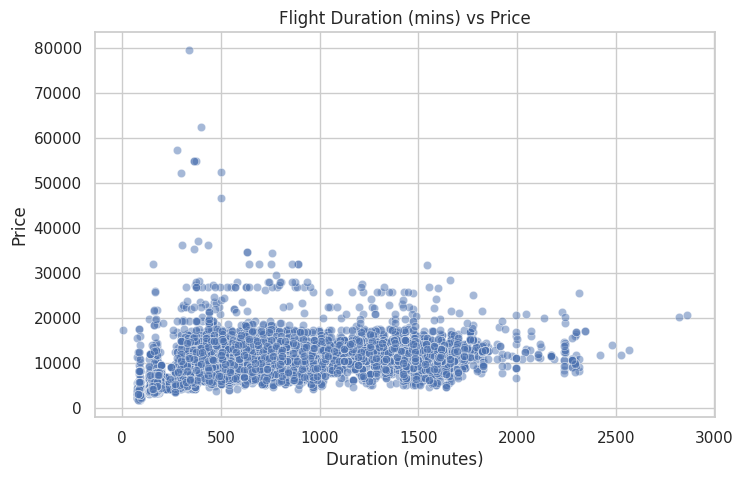

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Duration_mins', y='Price', data=df, alpha=0.5)
plt.title('Flight Duration (mins) vs Price')
plt.xlabel('Duration (minutes)')
plt.show()